In [1]:
import numpy as np
import pandas as pd

In [2]:
df= pd.read_csv("fullwaydone.csv")               #loaded the data with extracted feaures
df.head(4)

,Unnamed: 0,Unnamed: 0.1,date,user_id,prod_id,rating,review,label,avg_Urating,avg_Prating,...,U_rev_perday,mul_rev,4ormore,2orless,pos_to_neg_ratio,subjectivity,polarity,reviewcopy,#ofwordswostp,le_d
0,0,0,08-12-2014,923,0,3,The food at snack is a selection of popular Gr...,0,4.435897,4.071429,...,2,1,35,1,35.0,0.395833,0.195833,food snack selection popular greek dishes appe...,20,50.000000
1,1,35,08-12-2014,923,880,3,Salads are good. Prices are good. Pesto lasagn...,0,4.435897,4.338889,...,2,1,35,1,35.0,0.615278,0.318056,salads good prices good pesto lasagna good bit...,15,51.724138
2,2,1,14-01-2014,923,19,5,The restaurant is on the ground floor of a typ...,0,4.435897,4.261905,...,2,1,35,1,35.0,0.563265,0.247789,restaurant ground floor typical park slope bro...,51,53.125000
3,3,30,14-01-2014,923,717,5,Their pickled vegetable soul is excellent. We ...,0,4.435897,3.777778,...,2,1,35,1,35.0,0.617316,0.296970,pickled vegetable soul excellent dumplings chi...,42,50.000000


In [3]:
df = df.sample(frac=1).reset_index(drop=True)         #shuffling
df.head(4)

,Unnamed: 0,Unnamed: 0.1,date,user_id,prod_id,rating,review,label,avg_Urating,avg_Prating,...,U_rev_perday,mul_rev,4ormore,2orless,pos_to_neg_ratio,subjectivity,polarity,reviewcopy,#ofwordswostp,le_d
0,4194,4194,09-01-2010,50456,649,2,As much as I enjoy the food here I dont see wh...,0,3.333333,4.308108,...,1,1,1,1,1.000000,0.325000,0.150000,much enjoy food dont see fuss solid italian re...,35,48.611111
1,11831,11831,21-09-2014,157543,247,5,This is THE restaurant that I bring my friends...,0,5.000000,4.071380,...,1,1,1,0,1.695043,0.550350,0.250874,restaurant bring friends town even long wait r...,47,47.959184
2,981,981,08-01-2012,2954,602,5,I begrudgingly met some friends at East Villag...,1,4.055556,3.959459,...,1,1,16,0,1.695043,0.503501,0.186632,begrudgingly met friends east village tavern w...,83,53.205128
3,23938,23938,25-11-2013,110931,555,5,awesom,0,5.000000,4.218267,...,1,1,1,0,1.695043,0.000000,0.000000,awesom,1,100.000000


In [4]:
#dropping unnecessary columns
df.drop(['Unnamed: 0','Unnamed: 0.1','date','user_id','prod_id','review','postags','nouns','noun_count','verbs','verb_count','adverbs', 'adverb_count', 'adjectives', 'adj_count','pronouns', 'pronoun_count', 'posspronouns',
       'posspronoun_count', 'perprocount','tokens','text_lemmatized', 'lemmatizedtokens','ones','reviewcopy','4ormore','2orless',
       '#ofwordswostp'],axis=1,inplace=True)
df.columns

Index(['rating', 'label', 'avg_Urating', 'avg_Prating', 'UCcounts', 'PCcounts',
       '#ofwords', 'Uavg#word', 'ratdev', 'noun%', 'imag_to_info',
       'selfreference_div', 'capitals', 'assum_fut_count', 'U_rev_perday',
       'mul_rev', 'pos_to_neg_ratio', 'subjectivity', 'polarity', 'le_d'],
      dtype='object')

In [5]:
columntitles=['rating', 'avg_Urating', 'avg_Prating', 'UCcounts', 'PCcounts',
       '#ofwords', 'Uavg#word', 'ratdev', 'noun%', 'imag_to_info',
       'selfreference_div', 'capitals', 'assum_fut_count', 'U_rev_perday',
       'mul_rev', 'pos_to_neg_ratio', 'subjectivity', 'polarity', 'le_d','label']
df=df.reindex(columns=columntitles)
df.head()

,rating,avg_Urating,avg_Prating,UCcounts,PCcounts,#ofwords,Uavg#word,ratdev,noun%,imag_to_info,selfreference_div,capitals,assum_fut_count,U_rev_perday,mul_rev,pos_to_neg_ratio,subjectivity,polarity,le_d,label
0,2,3.333333,4.308108,3,185,72,43.666667,0.308108,20.833333,0.695652,0.666667,3,0,1,1,1.000000,0.325000,0.150000,48.611111,0
1,5,5.000000,4.071380,1,1471,98,98.000000,0.928620,28.571429,0.452381,0.600000,3,0,1,1,1.695043,0.550350,0.250874,47.959184,0
2,5,4.055556,3.959459,18,74,156,52.666667,0.040541,24.358974,0.705882,0.785714,8,0,1,1,1.695043,0.503501,0.186632,53.205128,1
3,5,5.000000,4.218267,1,1489,1,1.000000,0.218267,100.000000,0.000000,0.814177,0,0,1,1,1.695043,0.000000,0.000000,100.000000,0
4,5,5.000000,4.456693,1,254,220,220.000000,0.543307,26.818182,0.679487,0.583333,1,2,1,1,1.695043,0.509097,0.135069,47.272727,0


In [6]:
df=df.replace([np.inf, -np.inf], np.nan) 

In [7]:
df.isnull().sum().sum()         #total missing /nan in whole df

111

In [8]:
df= df.fillna(0)

In [9]:
df.isnull().sum().sum() 

0

<function matplotlib.pyplot.show(*args, **kw)>

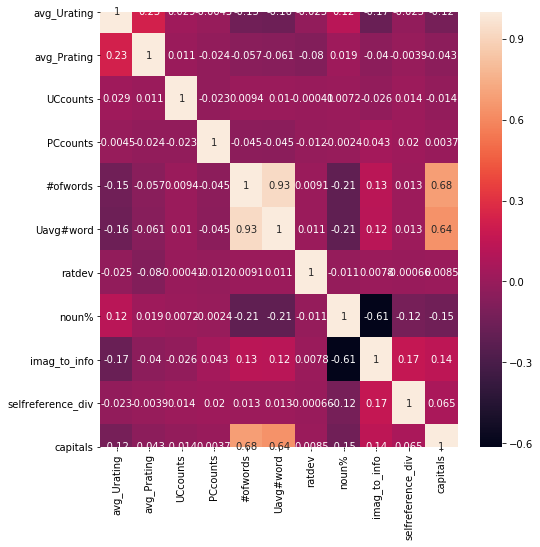

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns                              #correlation between first 12 features 
plt.figure(figsize=(8,8))
sns.heatmap(df.iloc[:,1:12].corr(),annot=True)
plt.show

In [13]:
y= df['label'].to_numpy()
y

array([0, 0, 1, ..., 1, 0, 0], dtype=int64)

In [14]:
df1= df
df= df.drop(columns=['label'])
X= df.to_numpy()
X.shape

(73770, 19)

In [15]:
y.shape

(73770,)

In [16]:
from numpy import hstack
from numpy import vstack
from numpy import asarray
from sklearn.datasets import make_blobs
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

In [17]:
# create a list of base-models
def get_models():
	models = list()
	models.append(LogisticRegression(solver='saga'))
	models.append(DecisionTreeClassifier())
	models.append(SVC(gamma='scale', probability=True))
	models.append(GaussianNB())
    #models.append(KNeighborsClassifier())                removed this bcz it was giving memory error.. ran each model individually then it got exposed
	models.append(AdaBoostClassifier())
	models.append(BaggingClassifier(n_estimators=10))
	models.append(RandomForestClassifier(n_estimators=10))
	models.append(ExtraTreesClassifier(n_estimators=10))
	return models

In [18]:
# collect out of fold predictions from k-fold cross validation
def get_out_of_fold_predictions(X, y, models):
	meta_X, meta_y = list(), list()
	# define split of data
	kfold = KFold(n_splits=10, shuffle=True)
	# enumerate splits
	for train_ix, test_ix in kfold.split(X):
		fold_yhats = list()
		# get data
		train_X, test_X = X[train_ix], X[test_ix]
		train_y, test_y = y[train_ix], y[test_ix]
		meta_y.extend(test_y)
		# fit and make predictions with each sub-model
		for model in models:
			model.fit(train_X, train_y)
			yhat = model.predict_proba(test_X)
			# store columns
			fold_yhats.append(yhat)
		# store fold yhats as columns
		meta_X.append(hstack(fold_yhats))
	return vstack(meta_X), asarray(meta_y)

In [19]:
# fit all base models on the training dataset
def fit_base_models(X, y, models):
	for model in models:
		model.fit(X, y)

In [20]:
# fit a meta model
def fit_meta_model(X, y):
	model = LogisticRegression(solver='saga')
	model.fit(X, y)
	return model

In [21]:
# evaluate a list of models on a dataset
def evaluate_models(X, y, models):
	for model in models:
		yhat = model.predict(X)
		acc = accuracy_score(y, yhat)
		print('%s: %.3f' % (model.__class__.__name__, acc*100))

In [22]:
# make predictions with stacked model
def super_learner_predictions(X, models, meta_model):
	meta_X = list()
	for model in models:
		yhat = model.predict_proba(X)
		meta_X.append(yhat)
	meta_X = hstack(meta_X)
	# predict
	return meta_model.predict(meta_X)

In [23]:
# split
X, X_val, y, y_val = train_test_split(X, y, test_size=0.50)
print('Train', X.shape, y.shape, 'Test', X_val.shape, y_val.shape)

Train (36885, 19) (36885,) Test (36885, 19) (36885,)


In [24]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()                                 #feature scaling---- StandardScaler makes the mean of the distribution 0. About 68% of the values will lie be between -1 and 1.
X= sc.fit_transform(X)
X_val= sc.fit_transform(X_val)

In [26]:
X

array([[-0.86092025, -0.93027977, -1.74336493, ..., -0.32116377,
        -0.92769599,  0.23741737],
       [ 0.85505843,  0.9258544 , -0.76800613, ..., -0.19204577,
        -0.3167218 , -0.12899064],
       [-0.00293091, -0.00221269, -1.82839177, ..., -0.79466622,
        -0.25974941,  0.71159243],
       ...,
       [-0.86092025, -0.59280083, -1.01530455, ...,  0.21618199,
        -0.85231655,  0.04774734],
       [ 0.85505843,  0.9258544 ,  0.78046637, ..., -1.28563992,
        -1.46109502, -0.78038265],
       [ 0.85505843,  0.9258544 ,  0.32950833, ..., -0.35537396,
        -0.21964767, -0.56289485]])

In [27]:
# get models
models = get_models()

In [28]:
# get out of fold predictions
meta_X, meta_y = get_out_of_fold_predictions(X, y, models)            #took 4 hrs to train
print('Meta ', meta_X.shape, meta_y.shape)

Meta  (36885, 16) (36885,)


In [29]:
# fit base models
fit_base_models(X, y, models)

In [30]:
# fit the meta model
meta_model = fit_meta_model(meta_X, meta_y)

In [31]:
# evaluate base models
evaluate_models(X_val, y_val, models)                          #evaluation on accuracy

LogisticRegression: 63.134
DecisionTreeClassifier: 59.902
SVC: 67.155
GaussianNB: 60.952
AdaBoostClassifier: 66.092
BaggingClassifier: 63.969
RandomForestClassifier: 64.132
ExtraTreesClassifier: 63.999


In [32]:
# evaluate meta model
yhat = super_learner_predictions(X_val, models, meta_model)
print('Super Learner: %.3f' % (accuracy_score(y_val, yhat) * 100))

Super Learner: 67.054


In [33]:
from sklearn.metrics import classification_report , accuracy_score, precision_score, recall_score
for i in range(len(models)):
    print('base_model', i)                                                                                            # print(classification_report(y_val,models[i].predict(X_val)))       #learn classification report  
    print('accuracy:',accuracy_score(y_val,models[i].predict(X_val)))
    print('precision',precision_score(y_val,models[i].predict(X_val)))
    print('recall',recall_score(y_val,models[i].predict(X_val)))
    print('  ')
    
                                                                                                                       #findings- accuracy and precision of svc(2) is greatest among all base models .. and recall is greatest for Gaussian NB(3)

base_model 0
accuracy: 0.6313406533821336
precision 0.6266639255794829
recall 0.6581205807740055
  
base_model 1
accuracy: 0.5990239934932899
precision 0.6004948098746841
recall 0.6026339936309171
  
base_model 2
accuracy: 0.6715466992002169
precision 0.6843164309532023
recall 0.6424677497706051
  
base_model 3
accuracy: 0.609516063440423
precision 0.576263037206894
recall 0.8409888271171804
  
base_model 4
accuracy: 0.6609190727938187
precision 0.6622641509433962
recall 0.663086306471636
  
base_model 5
accuracy: 0.6396909312728751
precision 0.6666878859252657
recall 0.5652831003400443
  
base_model 6
accuracy: 0.6413176087840585
precision 0.6715683099047742
recall 0.5595617207319048
  
base_model 7
accuracy: 0.6399891554832587
precision 0.6684210526315789
recall 0.5620985588600421
  


In [34]:
print('meta model')                                                                                                    #imp note- here yhat ie metamodel's prediction is passed . we cant do meta_model.predict(X_val )bcz meta model is trained on out of fold predictions ie 8 columns(corresponding to each base model) but X_val has columns = no.of feaures
print('accuracy:',accuracy_score(y_val,yhat))
print('precision',precision_score(y_val,yhat))
print('recall',recall_score(y_val,yhat))

meta model
accuracy: 0.6705435814016538
precision 0.6796078210401758
recall 0.6509958439034922


# roc and auc

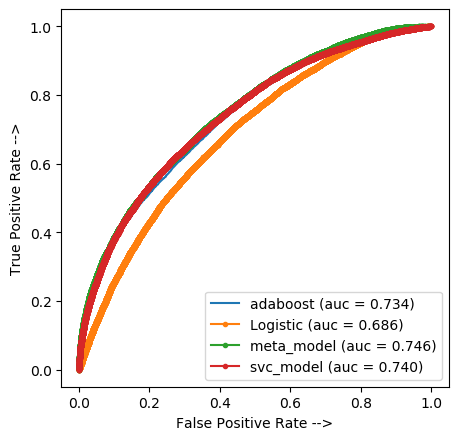

In [38]:
model0 =models[0]                                               #logistic regression
y_pred0 = model0.decision_function(X_val)
model4 =models[4]                                               #adaboost
y_pred4 = model4.decision_function(X_val)
model_meta = meta_model
y_pred2 = model2.decision_function(X_val)                       #svc


def super_learner_predictions2(X, models, meta_model):          #using decision_function
	meta_X = list()
	for model in models:
		yhat = model.predict_proba(X)
		meta_X.append(yhat)
	meta_X = hstack(meta_X)
	# predict
	return meta_model.decision_function(meta_X)

yhat2= super_learner_predictions2(X_val, models, meta_model)                                                            #decision_function predictions for meta model on test/val data




from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt                                                                                          #other models like decision tree etc were showing attribute error for decision_functon

logistic_fpr, logistic_tpr, threshold = roc_curve(y_val, y_pred0)
auc_logistic = auc(logistic_fpr, logistic_tpr)

adaboost_fpr, adaboost_tpr, threshold = roc_curve(y_val, y_pred4)
auc_adaboost = auc(adaboost_fpr, adaboost_tpr)

meta_fpr, meta_tpr, threshold = roc_curve(y_val,yhat2 )
auc_meta = auc(meta_fpr, meta_tpr)

svc_fpr, svc_tpr, threshold = roc_curve(y_val, y_pred2)
auc_svc = auc(svc_fpr, svc_tpr)



plt.figure(figsize=(5, 5), dpi=100)
plt.plot(adaboost_fpr, adaboost_tpr, linestyle='-', label='adaboost (auc = %0.3f)' % auc_adaboost)
plt.plot(logistic_fpr, logistic_tpr,marker='.', label='Logistic (auc = %0.3f)' % auc_logistic)
plt.plot(meta_fpr, meta_tpr,marker='.', label='meta_model (auc = %0.3f)' % auc_meta)
plt.plot(svc_fpr, svc_tpr,marker='.', label='svc_model (auc = %0.3f)' % auc_svc)



plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')

plt.legend()

plt.show()

In [ ]:
# meta model's auc is the greatest